# Hierarchical Clustering

## Library 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
가까운 거리를 유크리드 로 계산해서 하나로 만들고
다시 또 가까운 곳의 거리를 계산해서 하나의 덩어리로 만듬
이런식으로 계산 반복해서 
뭉쳐서 큰 cluster가 나올 때까지 반복
마지막 한 덩어리 클러스터가 만들어지면 끝나는 

In [ ]:
Dendrogram을 만들면
거리가 길면 (긴 선)이면 그룹 거리가 멀다

길게 선이 되어 있는 것을 수평으로 선을 그어서 아래쪽에 있는 것들이
클러스터의 갯수

## dataset 읽어오기

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df.iloc[:, 3:4+1]

차트 그릴때 에러 방지를 위해서 X.values만 사용

In [6]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
X = X.values

In [9]:
import scipy.cluster.hierarchy as sch

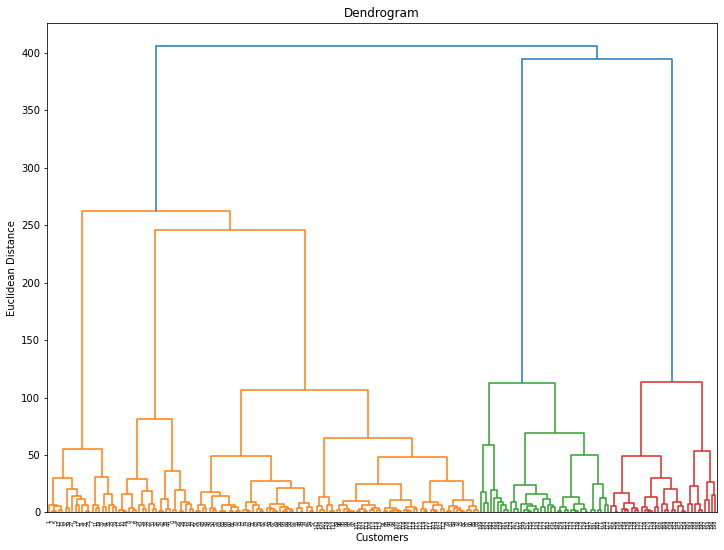

In [12]:
# 클러스터와 선과 거리를 구하는 방식을 어떤방식으로 할지 정하는 파라미터method=
plt.figure(figsize=(12,9))
dendrogram = sch.dendrogram( sch.linkage(X, method='ward') )
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#위의 dendrogram을 보면 선이 긴것이 거리가 긴 것이니깐
# 중간으로 수평선을 그어보면 5개의 그룹화가 가능

## Dendrogram 을 그리고, 최적의 클러스터 갯수를 찾아보자.

## Training the Hierarchical Clustering model

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
# 위에서 
hc = AgglomerativeClustering( n_clusters=5, linkage='ward')

In [16]:
y_hc = hc.fit_predict(X)

In [17]:
df['Group'] = y_hc

In [18]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [21]:
#해당 그룹을 해당하는 데이터를 다 가지고 와서 마케팅을 한다던가.. 활용할 수 있음
df.loc[ df['Group'] == 4, ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
12,13,Female,58,20,15,4
14,15,Male,37,20,13,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4


## 그루핑 정보를 확인

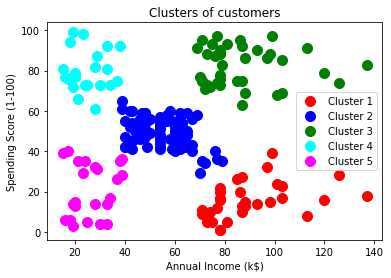

In [22]:
# X 1번째컬럼, X의 3번째 컬럼
# numpy 문법으로 만들어져서 이렇게 되어 있음
# pandas이면 X.loc[, ] 이런식으로 가져와야함
# 그래서 위에서 X 값을 X = X.valuse 로 넣어줘서 ndarray로 만든 것임

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 그룹 정보를 데이터셋에 추가

## 마케팅 이메일을 보내기 위해, 3번 그룹의 고객들만 가져와보자. 